<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%ED%95%B8%EB%93%A4%EB%A7%81/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

## 데이터 프레임 인덱스 설정

In [ ]:
# 1. 데이터 프레임의 속성값에 직접 입력 
df = pd.DataFrame(np.arange(9).reshape(3, 3))
df.index = ['a', 'b', 'c']
df

,0,1,2
a,0,1,2
b,3,4,5
c,6,7,8


In [ ]:
# 2. 내부 컬럼(열) 이용
df2 = pd.DataFrame([
    ['a', 0, 1, 2],
    ['b', 3, 4, 5],
    ['c', 6, 7, 8]
])

df2

,0,1,2,3
0,a,0,1,2
1,b,3,4,5
2,c,6,7,8


In [ ]:
df2.set_index(0, inplace=True) # drop=True (인덱스로 만든 열을 기존 데이터프레임에서 지울 것인지)
                               # append=False (기존 인덱스를 삭제할 것인지)
                               # inplace=False (원본 객체를 변경할 것인지): deprecated
df2

,1,2,3
0,,,
a,0,1,2
b,3,4,5
c,6,7,8


In [ ]:
# 3. 데이터 프레임의 컬럼을 재설정 
df2.reset_index() # drop=False (인덱스로 만든 열을 기존 데이터프레임에서 지울 것인지)
                  # inplace=False (기본 인덱스를 삭제할 것인지)

,0,1,2,3
0,a,0,1,2
1,b,3,4,5
2,c,6,7,8


In [ ]:
df2 # 원본 데이터 유지 

,1,2,3
0,,,
a,0,1,2
b,3,4,5
c,6,7,8


## DAS 1기의 MBTI 살펴보기 

In [95]:
mbti = [
    'ISTJ','INFJ','ISTJ','ESTP','ENTP','ISFP','ISTJ','INFJ','ISTJ','ESTJ',
    'ENFJ','INFJ','ENFP','ESFP','ENFJ','INTJ','INTP','ISTP','ISFJ','ISTJ',
    'INTP','ISFJ','ESTJ','ISFP','ENFP','ENTJ','ISTP','ISTP','ENFJ','ENFP',
    'ESTJ','ENTP','ISFP','ENTP','ESFP','ISFJ','ISTJ','ENTJ','ENFJ','ISFP',
    'ENFJ','ENFP','ISFJ','ISFJ','ENFP','ESTJ','ENTJ'
]

In [96]:
ds_mbti = pd.DataFrame(mbti)
# ds_mbti

In [ ]:
ds_mbti.head()

,0
0,ISTJ
1,INFJ
2,ISTJ
3,ESTP
4,ENTP


In [ ]:
ds_mbti.tail()

,0
42,ISFJ
43,ISFJ
44,ENFP
45,ESTJ
46,ENTJ


In [ ]:
ds_mbti.describe() # 문자열 describe 

,0
count,47
unique,14
top,ISTJ
freq,6


In [ ]:
ds_mbti[0] # Series 형식 

In [ ]:
ds_mbti[0].str.contains('I') # Boolean

In [ ]:
mbti_i = ds_mbti[ds_mbti[0].str.contains('I')] # DataFrame 형식 

In [ ]:
mbti_e = ds_mbti[ds_mbti[0].str.contains('E')]

In [ ]:
mbti_i.describe()

,0
count,24
unique,7
top,ISTJ
freq,6


In [ ]:
mbti_e.describe()

,0
count,23
unique,7
top,ENFJ
freq,5


In [ ]:
mbti_t = ds_mbti[ds_mbti[0].str.contains('T')]

In [ ]:
mbti_f = ds_mbti[ds_mbti[0].str.contains('F')]

In [ ]:
mbti_t.describe()

,0
count,23
unique,8
top,ISTJ
freq,6


In [ ]:
mbti_f.describe()

,0
count,24
unique,6
top,ENFJ
freq,5


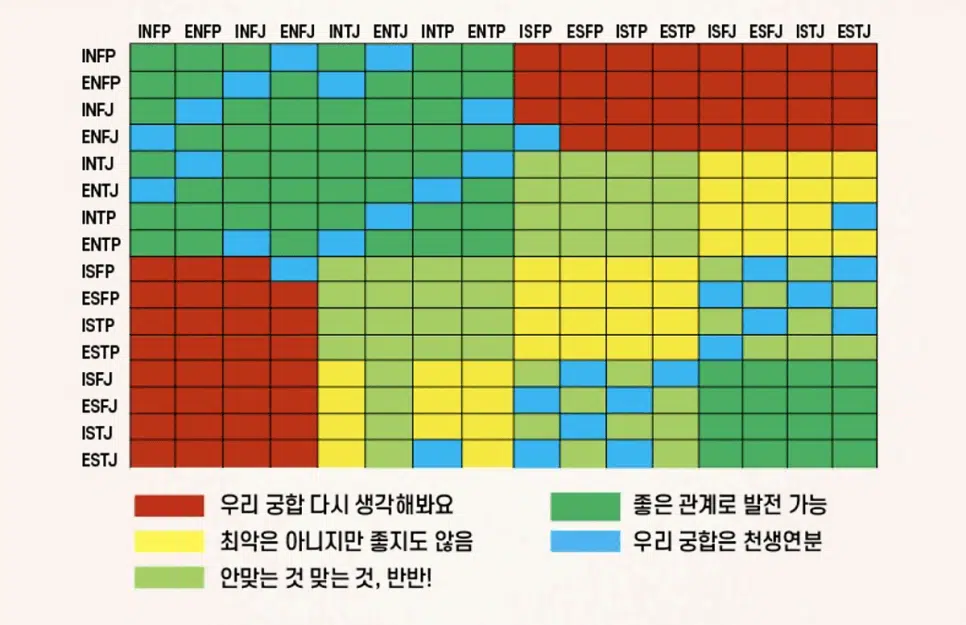

In [98]:
# MBTI 궁합 알아보기 
df_mbti = pd.DataFrame([
    [4, 4, 4, 5, 4, 5, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1], # INFP
    [4, 4, 5, 4, 5, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1], # ENFP
    [4, 5, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1], # INFJ
    [5, 4, 4, 4, 4, 4, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1], # ENFJ
    [4, 5, 4, 4, 4, 4, 4, 5, 3, 3, 3, 3, 2, 2, 2, 2], # INTJ
    [5, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 3, 2, 2, 2, 2], # ENTJ
    [4, 4, 4, 4, 4, 5, 4, 4, 3, 3, 3, 3, 2, 2, 2, 5], # INTP
    [4, 4, 5, 4, 5, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2], # ENTP
    [1, 1, 1, 5, 3, 3, 3, 3, 2, 2, 2, 2, 4, 5, 4, 5], # ISFP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 4, 5, 4], # ESFP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 4, 5, 4, 5], # ISTP
    [1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 5, 4, 4, 4], # ESTP
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 5, 4, 4, 4, 4], # ISFJ
    [1, 1, 1, 1, 2, 3, 2, 2, 5, 3, 5, 3, 4, 4, 4, 4], # ESFJ
    [1, 1, 1, 1, 2, 3, 2, 2, 3, 5, 3, 3, 4, 4, 4, 4], # ISTJ
    [1, 1, 1, 1, 2, 3, 5, 2, 5, 3, 5, 3, 4, 4, 4, 4]  # ESTJ
    ],
    columns = ['INFP', 'ENFP', 'INFJ', 'ENFJ', 'INTJ', 'ENTJ', 'INTP', 'ENTP', 
               'ISFP', 'ESFP', 'ISTP', 'ESTP', 'ISFJ', 'ESFJ', 'ISTJ', 'ESTJ'],
    index = ['INFP', 'ENFP', 'INFJ', 'ENFJ', 'INTJ', 'ENTJ', 'INTP', 'ENTP', 
             'ISFP', 'ESFP', 'ISTP', 'ESTP', 'ISFJ', 'ESFJ', 'ISTJ', 'ESTJ'])

# df_mbti

In [ ]:
df_mbti.loc['INFP', 'ENTP']

4

In [ ]:
a = input() # 내 MBTI
b = input() # 상대 MBTI
df_mbti.loc[a, b]

ISFP
ESFJ


5

In [ ]:
# text = ['매우 좋음', '좋음', '보통', '나쁨', '매우 나쁨']
# result = text[n-1]

---
# 데이터 분류
- 정형 데이터 : EXCEL, CSV, TXT
- 반정형 데이터 : JSON, XML, HTML
- 비정형 데이터 : 이미지, 한글(.HWP)

# 정형 데이터

## EXCEL

In [ ]:
# colab 환경 
from google.colab import files
file = files.upload()

Saving rawData_sheetplus.xlsx to rawData_sheetplus (1).xlsx


In [ ]:
import io
import pandas as pd

In [ ]:
# 엑셀 파일 불러오기
df_excel = pd.read_excel('rawData_sheetplus.xlsx')
# df_excel = pd.read_excel(io.BytesIO(file['rawData_sheetplus.xlsx']))

In [ ]:
df_excel

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


In [ ]:
df_excel.describe()

,연차,연도,매출,순익,직원수
count,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000
mean,5.833333,2016.166667,5.433333e+06,2.006667e+06,98.500000
std,2.857738,2.857738,1.721240e+06,6.218574e+05,111.009459
min,2.000000,2012.000000,3.700000e+06,1.370000e+06,38.000000
25%,4.250000,2014.500000,4.150000e+06,1.517500e+06,40.250000
50%,5.500000,2016.500000,4.950000e+06,1.935000e+06,46.500000
75%,7.500000,2017.750000,6.575000e+06,2.300000e+06,88.000000
max,10.000000,2020.000000,8.000000e+06,3.000000e+06,320.000000


In [ ]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   연차      6 non-null      int64
 1   연도      6 non-null      int64
 2   매출      6 non-null      int64
 3   순익      6 non-null      int64
 4   직원수     6 non-null      int64
dtypes: int64(5)
memory usage: 368.0 bytes


In [ ]:
# sheet_name : 엑셀 파일 시트별로 불러오기
df_excel_sheet1 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name='Sheet1') # 첫번째 시트 가져오기 

In [ ]:
df_excel_sheet2 = pd.read_excel('rawData_sheetplus.xlsx', sheet_name='Sheet2') # 두번째 시트 가져오기

In [ ]:
df_excel_sheet3 = pd.read_excel('rawData_sheetplus.xlsx', 
                                sheet_name=[0, 'Sheet2']) # 시트를 선택해서 가져오기
df_excel_sheet3 # Dictionary 형태 출력

{0:    연차    연도       매출       순익  직원수
 0   2  2020  4000000  1400000   40
 1   4  2018  3700000  1370000   38
 2   6  2016  5300000  2000000   52
 3   8  2014  7000000  2400000  100
 4  10  2012  8000000  3000000  320
 5   5  2017  4600000  1870000   41,
 'Sheet2':    연차    연도       매출       순익  직원수
 0   1  2021  4000000  1400000   10
 1   2  2020  3700000  1370000   20
 2   3  2019  5300000  2000000   30
 3   4  2018  7000000  2400000   40
 4   5  2017  8000000  3000000   50
 5   6  2016  4600000  1870000   60}

In [ ]:
df_excel_sheet4 = pd.read_excel('rawData_sheetplus.xlsx', 
                                sheet_name=None) # 모든 시트 가져오기 
df_excel_sheet4

{'Sheet1':    연차    연도       매출       순익  직원수
 0   2  2020  4000000  1400000   40
 1   4  2018  3700000  1370000   38
 2   6  2016  5300000  2000000   52
 3   8  2014  7000000  2400000  100
 4  10  2012  8000000  3000000  320
 5   5  2017  4600000  1870000   41,
 'Sheet2':    연차    연도       매출       순익  직원수
 0   1  2021  4000000  1400000   10
 1   2  2020  3700000  1370000   20
 2   3  2019  5300000  2000000   30
 3   4  2018  7000000  2400000   40
 4   5  2017  8000000  3000000   50
 5   6  2016  4600000  1870000   60}

In [ ]:
# 엑셀 파일 작성하기 - 새로운 컬럼(열) 추가
df_excel['손실'] = [10000, 20000, 30000, 40000, 50000, 60000]
df_excel

,연차,연도,매출,순익,직원수,손실
0,2,2020,4000000,1400000,40,10000
1,4,2018,3700000,1370000,38,20000
2,6,2016,5300000,2000000,52,30000
3,8,2014,7000000,2400000,100,40000
4,10,2012,8000000,3000000,320,50000
5,5,2017,4600000,1870000,41,60000


In [ ]:
# 엑셀 파일로 내보내기
df_excel.to_excel('exit.xlsx')

In [ ]:
df_excel.to_excel('exit.xlsx', sheet_name='first') # 엑셀 파일 내보내기 + 시트 이름 지정하기 

## CSV

In [ ]:
csv = pd.read_csv('/content/sample_data/california_housing_test.csv')

# ** 오류 주의 **
# encoding : utf-8, cp949, euc-kr
# sep : 구분자를 입력 (',' - csv, '\s' - ssv, '\t' - tsv)

In [ ]:
csv.to_csv('csv_test.csv')

## TXT

In [ ]:
# txt 파일 불러오기 - read_table()
txt = pd.read_table('raw.txt') 

# txt 파일이지만 그 안에 내용을 보면 csv, tsv, ssv 로 되어있는 경우 많음 

In [ ]:
txt.head()

,연차
0,연도
1,매출
2,순익
3,직원수
4,2


In [ ]:
txt.to_csv('exit_txt.txt')

## 파일 공통 속성

### header (열 이름) 설정

In [ ]:
excel_header = pd.read_excel('rawData_sheetplus.xlsx', header=0)
# excel_header = pd.read_excel('rawData_sheetplus.xlsx', header=None)
excel_header

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


In [ ]:
excel_header = pd.read_excel('rawData_sheetplus.xlsx', header=None)
# header=None : 헤더를 내 값 안에서 설정하고 싶지 않을 때
excel_header

,0,1,2,3,4
0,연차,연도,매출,순익,직원수
1,2,2020,4000000,1400000,40
2,4,2018,3700000,1370000,38
3,6,2016,5300000,2000000,52
4,8,2014,7000000,2400000,100
5,10,2012,8000000,3000000,320
6,5,2017,4600000,1870000,41


In [ ]:
excel_header = pd.read_excel('rawData_sheetplus.xlsx',
                             names=['연차', '연도', '매출', '순이익', '직원수'])
# names의 숫자 == 컬럼의 숫자
# names : 새롭게 값을 할당시켜준다 
excel_header

,연차,연도,매출,순이익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


### index (행 이름) 설정 

In [ ]:
excel_index = pd.read_excel('rawData_sheetplus.xlsx', index_col='연차')
excel_index

,연도,매출,순익,직원수
연차,,,,
2,2020,4000000,1400000,40
4,2018,3700000,1370000,38
6,2016,5300000,2000000,52
8,2014,7000000,2400000,100
10,2012,8000000,3000000,320
5,2017,4600000,1870000,41


In [ ]:
# 인덱스 없이 불러올 때 (불러온 이후에 인덱스를 지정해주고 싶을 때)
excel_index = pd.read_excel('rawData_sheetplus.xlsx', index_col=None)
excel_index

,연차,연도,매출,순익,직원수
0,2,2020,4000000,1400000,40
1,4,2018,3700000,1370000,38
2,6,2016,5300000,2000000,52
3,8,2014,7000000,2400000,100
4,10,2012,8000000,3000000,320
5,5,2017,4600000,1870000,41


### 사용할 열 선택 

In [ ]:
# 데이터가 커서 원하는 컬럼만 불러오기 
excel_cols = pd.read_excel('rawData_sheetplus.xlsx', usecols=['연차', '매출'])
excel_cols

,연차,매출
0,2,4000000
1,4,3700000
2,6,5300000
3,8,7000000
4,10,8000000
5,5,4600000


### 제한할 행 선택 

In [ ]:
# 지울 행을 지정해서 그 행을 제외하고 가져오기
# skiprows=3 : 상단에서부터 3행 스킵
excel_rows = pd.read_excel('rawData_sheetplus.xlsx', skiprows=3, header=None)
excel_rows

,0,1,2,3,4
0,6,2016,5300000,2000000,52
1,8,2014,7000000,2400000,100
2,10,2012,8000000,3000000,320
3,5,2017,4600000,1870000,41


In [ ]:
# skiprows=[3] : 세번째 값 제외 (n번째 값만 제외)
excel_rows = pd.read_excel('rawData_sheetplus.xlsx', skiprows=[1, 2, 3], header=0)
excel_rows

,연차,연도,매출,순익,직원수
0,8,2014,7000000,2400000,100
1,10,2012,8000000,3000000,320
2,5,2017,4600000,1870000,41


In [ ]:
# skipfooter : 하단에서부터 스킵
excel_rows = pd.read_excel('rawData_sheetplus.xlsx', skipfooter=3, header=None)
excel_rows

,0,1,2,3,4
0,연차,연도,매출,순익,직원수
1,2,2020,4000000,1400000,40
2,4,2018,3700000,1370000,38
3,6,2016,5300000,2000000,52


# 반정형 데이터


## JSON 
- Javascript Object Notation

- {} 중괄호

```json
{
    'name': 'data',
    'age': 1
}
```

In [ ]:
# 파일 불러오기
shop = pd.read_json('data.json') # default : utf-8, cp949(windows 생성된 파일)
shop

,id,productName,price,stockCount,thumbnailImg,option,discountRate,shippingFee,detailInfoImage,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,asset/img/1/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,asset/img/2/thumbnailImg.jpg,[],0,1500,"[asset/detail/2/detail1.png, asset/detail/2/de...",0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,asset/img/3/thumbnailImg.jpg,[],0,1500,"[asset/detail/3/detail1.png, asset/detail/3/de...",0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,asset/img/4/thumbnailImg.jpg,[],0,1500,"[asset/detail/4/detail1.png, asset/detail/4/de...",0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,asset/img/5/thumbnailImg.jpg,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,"[asset/detail/5/detail1.png, asset/detail/5/de...",0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,asset/img/6/thumbnailImg.jpg,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,"[asset/detail/6/detail1.png, asset/detail/6/de...",0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,asset/img/7/thumbnailImg.jpg,[],0,1500,"[asset/detail/7/detail1.png, asset/detail/7/de...",0,2022-02-28,2022-02-28


In [ ]:
shop2 = pd.read_json('https://test.api.weniv.co.kr/mall') # 웹 상의 json 파일을 불러올 때

In [ ]:
# 파일 수정하기

# drop으로 특정 열 삭제 
shop = shop.drop(['thumbnailImg', 'detailInfoImage'], axis=1)
shop

,id,productName,price,stockCount,option,discountRate,shippingFee,viewCount,pubDate,modDate
0,1,버그를 Java라 버그잡는 개리씨 키링 개발자키링 금속키링,12500,100,[],0,1500,0,2022-02-28,2022-02-28
1,2,우당탕탕 라이캣의 실험실 스티커 팩,3500,1000,[],0,1500,0,2022-02-28,2022-02-28
2,3,딥러닝 개발자 무릎 담요,17500,0,[],0,1500,0,2022-02-28,2022-02-28
3,4,네 개발잡니다 개발자키링 금속키링,13500,100,[],0,1500,0,2022-02-28,2022-02-28
4,5,Hack Your Life 개발자 노트북 파우치,36000,230,"[{'id': 1, 'optionName': '13인치', 'additionalFe...",19,1500,0,2022-02-28,2022-02-28
5,6,"[NEW] 위니브 개발자, 캐릭터 스티커팩 2종",5500,1000,"[{'id': 1, 'optionName': '위니브 개발자 스티커팩', 'addi...",0,1500,0,2022-02-28,2022-02-28
6,7,제주코딩베이스캠프 코딩 연습장 세트,8000,1000,[],0,1500,0,2022-02-28,2022-02-28


In [ ]:
# 파일 내보내기
shop.to_json('json_.json')

## XML

- eXtensible Markup Language
- XML -> 데이터 전송
- HTML과 유사 -> 화면 구성

```xml
<person>
    <name>data</name>
    <age>1</age>
</person>
```

In [ ]:
# 파일 불러오기 
xml = pd.read_xml('raw_data.xml')
xml

,category,id,year,sales,profit,employees
0,develop,2,2020,4000000,1400000,40
1,develop,4,2018,3700000,1370000,38
2,develop,6,2016,5300000,2000000,52
3,accounting,8,2014,7000000,2400000,100
4,accounting,10,2012,8000000,3000000,320
5,accounting,5,2017,4600000,1870000,41


In [ ]:
# XML 형식
# <element></element> 요소
# <element 속성='값'></element>
# <element>'값'</element>

In [ ]:
# 파일 내보내기
xml.to_xml('write.xml')

## HTML

- HyperText Markup Language
- `<태그></태그>`
- 화면에 보여줄 때

```html
<html>
    <head></head>
    <body></body>
    <foot></foot>
</html>
```

In [ ]:
# 파일 불러오기
html = pd.read_html('https://paullab.co.kr/stock.html')
html

In [ ]:
stock = html[3]
stock

In [ ]:
stock.head()

,날짜,종가,전일비,시가,고가,저가,거래량
0,2019.10.23,6650,20,6590,6830,6580,398421
1,2019.10.22,6630,190,6830,6930,6530,919571
2,2019.10.21,6820,390,6440,6890,6360,1678055
3,2019.10.18,6430,480,6020,6620,5970,2168857
4,2019.10.17,5950,20,6100,6180,5840,1982922


In [ ]:
stock.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
15,2019.09.30,5000,10,5180,5300,4990,705046
16,2019.09.27,5010,50,5020,5080,4865,408859
17,2019.09.26,5060,0,5130,5200,4965,404633
18,2019.09.25,5060,270,5280,5320,5040,441923
19,2019.09.24,5330,10,5300,5370,5280,211019


In [ ]:
stock_ = stock['시가']

In [ ]:
# 파일 내보내기
stock.to_html('stock.html')

# 비정형 데이터

## 이미지

In [ ]:
# 이미지 작업을 도와주는 파이썬 라이브러리
# 이미지 인식 -> Pillow
# 이미지 출력 -> Matplotlib
!pip install Pillow
!pip install Matplotlib

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [88]:
gary = Image.open('thumbnailImg.jpg')
# gary

In [89]:
g = gary.convert('L') # 흑백 처리 
# g

In [ ]:
import numpy as np

In [86]:
pixel = np.array(gary)
# pixel
print(pixel.shape)

(510, 510, 3)


In [92]:
pixel_g = np.array(g)
print(pixel_g.shape)

(510, 510)


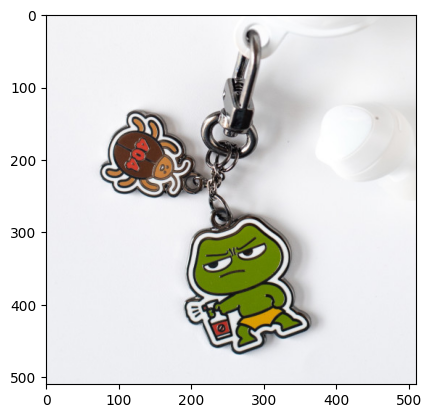

In [ ]:
plt.imshow(pixel)

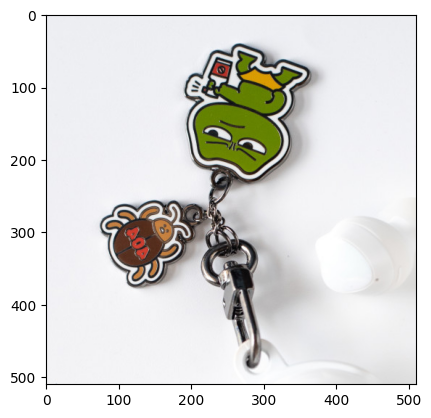

In [ ]:
plt.imshow(pixel[::-1]) # 상하 반전 

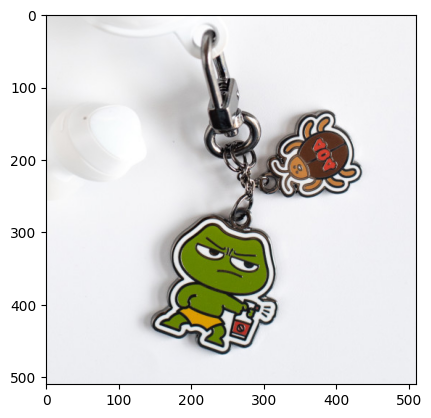

In [ ]:
plt.imshow(pixel[:, ::-1]) # 좌우 반전 

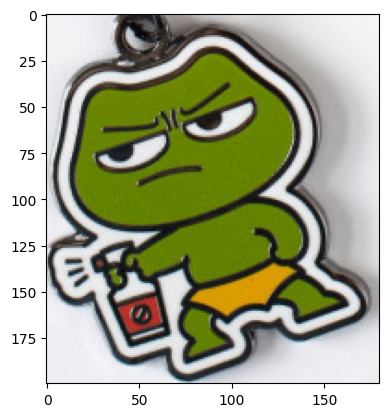

In [ ]:
plt.imshow(pixel[270:470, 190:370]) 

In [ ]:
pixel2 = pixel[270:470, 190:370]
pixel2.shape # 3 -> rgb 컬러 수 

(200, 180, 3)

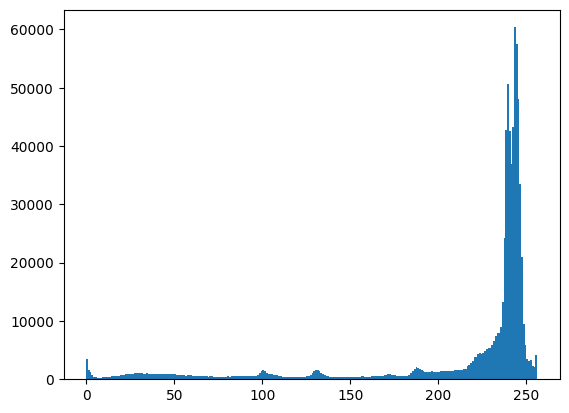

In [ ]:
# rgb 색상 사용 분포도 
plt.hist(pixel.ravel(), 256, [0, 256]) # ravel 평면화 
plt.show()

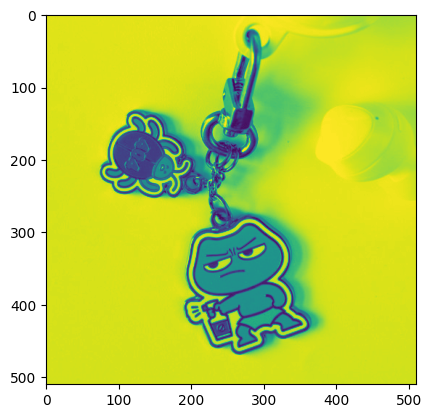

In [93]:
plt.imshow(pixel[:, :, 1]) # rgb 1 값만 사용

In [ ]:
# 이미지 불러왔을 때 
print(gary.filename)
print(gary.format)
print(gary.size)
print(gary.mode)
print(gary.width)
print(gary.height)

thumbnailImg.jpg
JPEG
(510, 510)
RGB
510
510


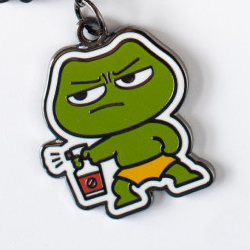

In [ ]:
# Pillow로 이미지 자르기
# cropped_gary = gary.crop([100, 100, 200, 200])
cropped_gary = gary.crop([150, 250, 400, 500]) 
cropped_gary.show()

In [ ]:
from PIL import ImageFilter
# BLUR, CONTOUR 꼭 기억하기 -> 왜 사용하는가?

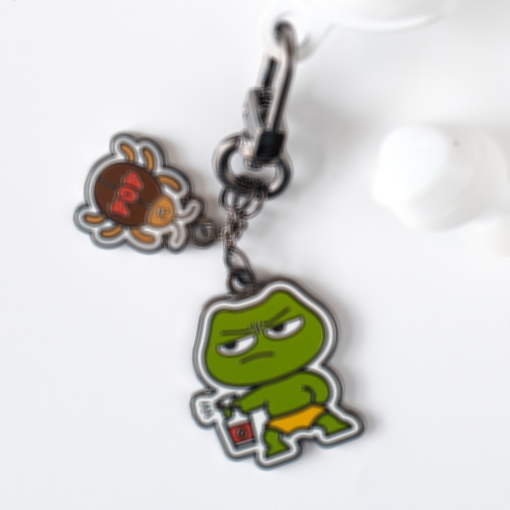

In [ ]:
# BLUR 블러 - 흐리게 하기 
blur_gary = gary.filter(ImageFilter.BLUR)
blur_gary.show() # 배열은 imshow()

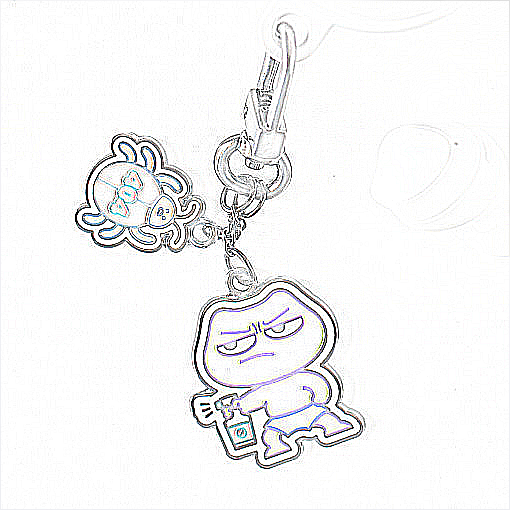

In [ ]:
# CONTOUR 컨투어 - 윤곽만 따오기 
contour_gary = gary.filter(ImageFilter.CONTOUR)
contour_gary.show()